In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('datasets\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [9]:
df.shape

(1000, 8)

In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [17]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [18]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [19]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [20]:
numerical_feature=[features for features in df.columns if df[features].dtype != 'O']
categorical_feature=[features for features in df.columns if df[features].dtype == 'O']

print('we have {} numerical features : {}'.format(len(numerical_feature),numerical_feature))
print('we hve {} categorical features : {}'.format(len(categorical_feature),categorical_feature))

we have 3 numerical features : ['math score', 'reading score', 'writing score']
we hve 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [21]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
reading_full=df[df['reading score'] == 100]['average'].count()
math_full=df[df['math score'] == 100]['average'].count()
writing_full=df[df['writing score'] == 100]['average'].count()

print(math_full)
print(writing_full)
print(reading_full)

7
14
17


In [25]:
reading_less_20=df[df['reading score'] <= 20]['average'].count()
math_less_20=df[df['math score'] <= 20]['average'].count()
writing_less_20=df[df['writing score'] <= 20]['average'].count()

print(reading_less_20)
print(writing_less_20)
print(math_less_20)

1
3
4


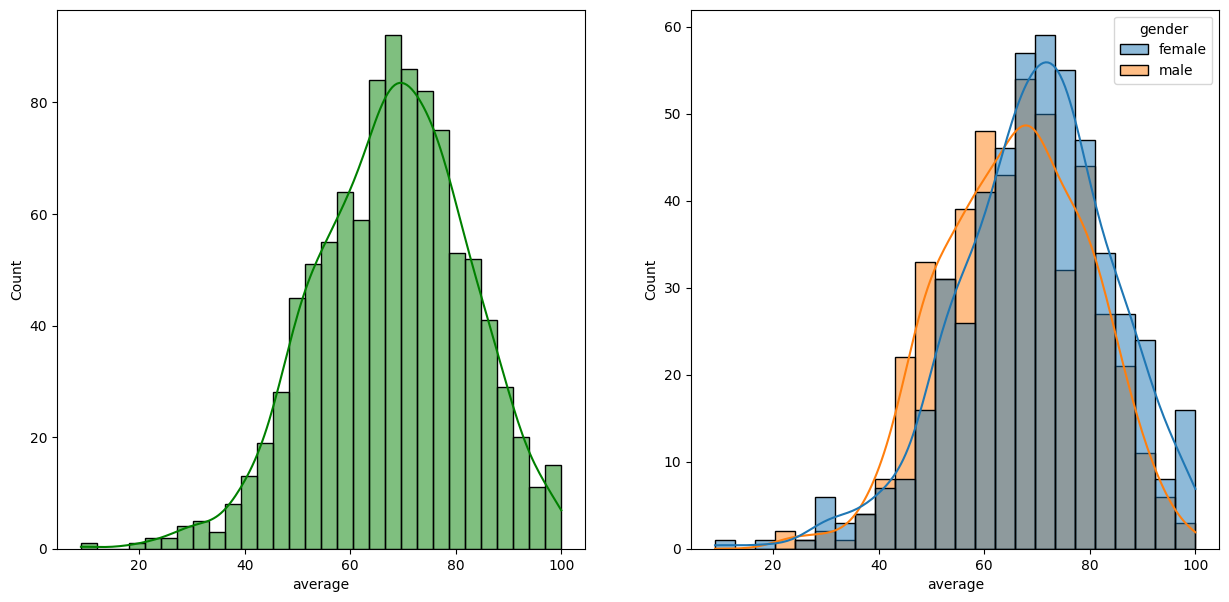

In [26]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

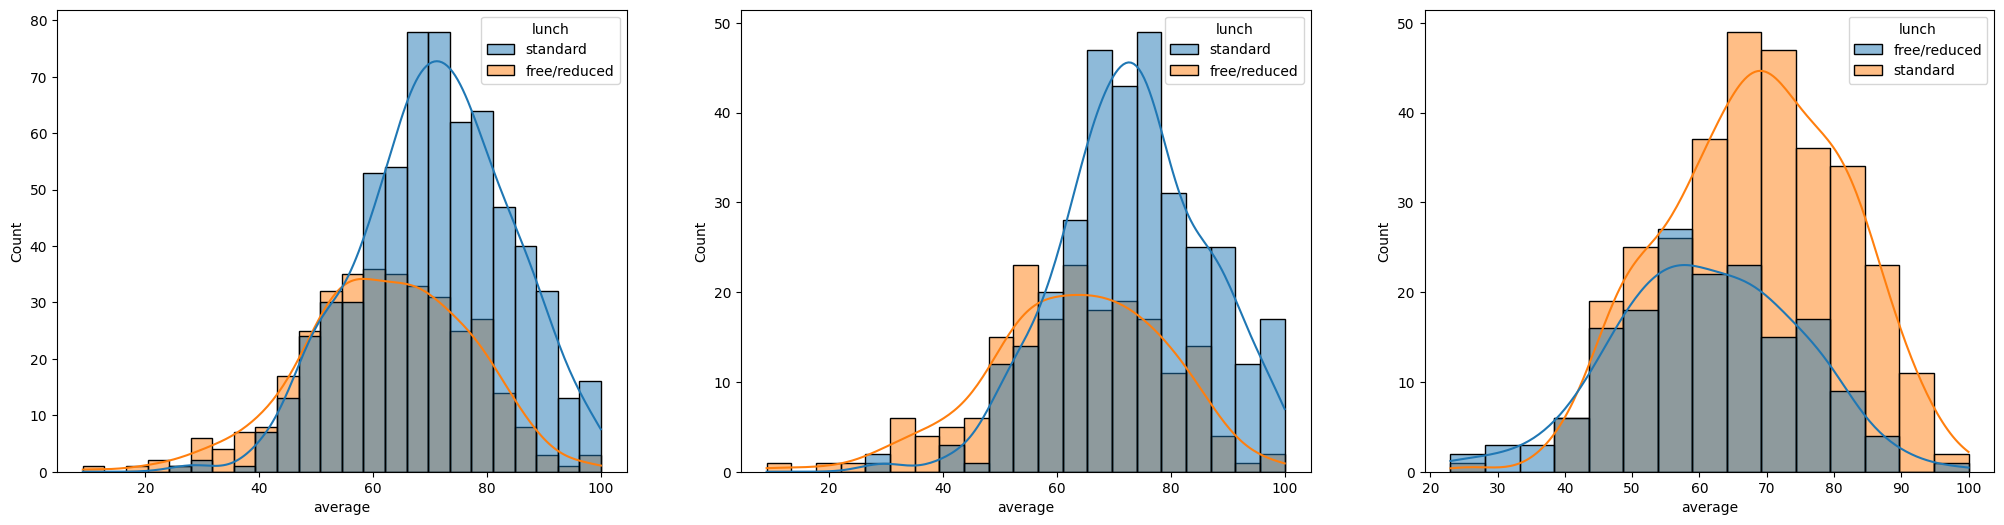

In [28]:
# Set up the figure size
plt.figure(figsize=(25, 6))

# First plot (overall)
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

# Second plot (female students)
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')

# Third plot (male students)
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')

# Display the plots
plt.show()